<a href="https://colab.research.google.com/github/acafiero/sales-predictions/blob/main/Cafiero_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

filename = '/content/drive/MyDrive/Colab Notebooks/sales_predictions.csv'

In [90]:
def evaluate_regression(y_true, y_pred):
  
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_true, y_pred)

  print(f'sales: \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.2f}')

In [2]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
filter = df['Item_Outlet_Sales']
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

## 12 columns and 8523 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data_types = df.dtypes
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
df.duplicated().sum()

## no duplicates

0

In [7]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
null_vals = df.isna().sum()
null_vals[null_vals>0]

Item_Weight    1463
Outlet_Size    2410
dtype: int64

In [9]:
df.drop(columns='Item_Weight', inplace=True)
df.isna().sum()

## dropping the weight category feels appropriate because more often than not, grocery sales are not measured by weight

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df.drop(columns='Item_Visibility', inplace=True)
df.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5405
Regular    2889
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [15]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [16]:
df['Item_Type'] = df['Item_Type'].replace('Breads', 'Starchy Foods')
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Starchy Foods             399
Hard Drinks               214
Others                    169
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [17]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [18]:
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

In [19]:
df[df['Outlet_Size'].isna()]

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,Regular,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,Regular,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,Regular,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,Low Fat,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,Regular,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...
8502,Low Fat,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,Regular,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,Low Fat,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,Regular,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [20]:
df.nunique()

Item_Fat_Content                3
Item_Type                      15
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [21]:
df['Item_MRP'].describe()

## min is $31.29, max is $266.89, and mean is $140.99

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [22]:
df['Item_Outlet_Sales'].describe()

## min is $33.29, max is $13086.96 and mean is $2181.29

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

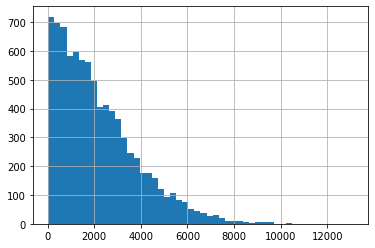

In [23]:
df['Item_Outlet_Sales'].hist(bins = 50)
plt.ticklabel_format(useOffset=False, style='plain')

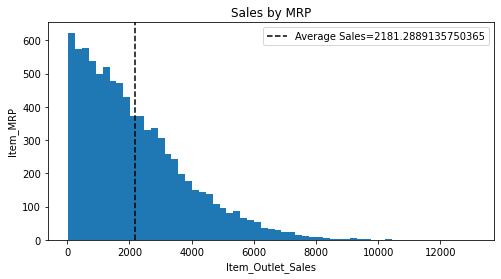

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
ax.hist(df['Item_Outlet_Sales'], bins='auto');

ax.set(xlabel = 'Item_Outlet_Sales', ylabel = 'Item_MRP',
       title = 'Sales by MRP')

mean = df['Item_Outlet_Sales'].mean()
ax.axvline(mean, color='black', ls='--',
            label=f"Average Sales={mean}")
ax.legend();

In [25]:
df['Outlet_Size'].value_counts(dropna = False)

Medium    2793
NaN       2410
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


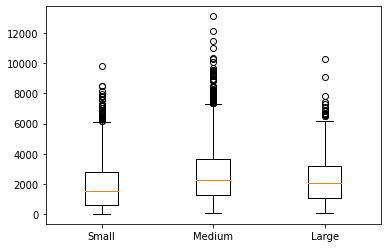

In [26]:
small = df.loc[df['Outlet_Size']=='Small','Item_Outlet_Sales'].values
medium = df.loc[df['Outlet_Size']=='Medium','Item_Outlet_Sales'].values
large = df.loc[df['Outlet_Size']=='Large','Item_Outlet_Sales'].values

plt.boxplot([small,medium,large], labels=['Small', 'Medium', 'Large']);

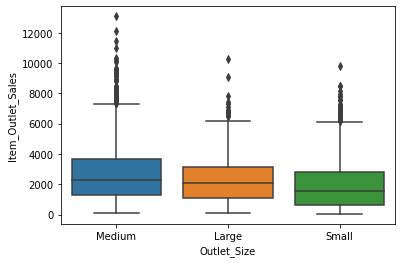

In [27]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)

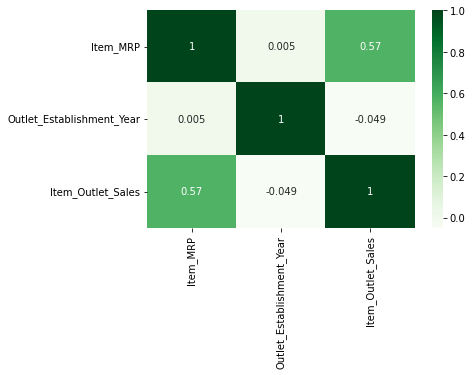

In [28]:
corr = df.corr()

sns.heatmap(corr, cmap = 'Greens', annot = True)

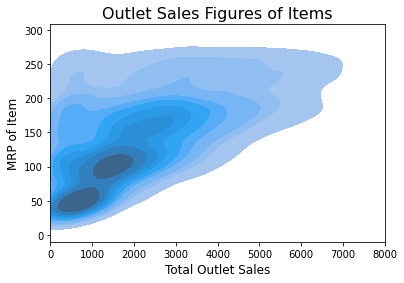

In [69]:
plt.xlim(left=0,right=8000)
sns.kdeplot(x='Item_Outlet_Sales', y='Item_MRPf', shade=True, data=df)
plt.xlabel('Total Outlet Sales', fontsize = 12)
plt.ylabel('MRP of Item', fontsize = 12)
plt.title('Outlet Sales Figures of Items', fontsize = 16)
plt.show()

In [30]:
y = df['Item_Outlet_Sales']
X = df.drop('Item_Outlet_Sales', axis=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


In [32]:
cat_select = make_column_selector(dtype_include='object')
num_select = make_column_selector(dtype_include='number')

In [33]:
cat_select(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [54]:
train_cat_data = X_train[cat_select(X_train)]
test_cat_data = X_test[cat_select(X_test)]
train_cat_data

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,OUT018,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,OUT049,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,OUT035,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,OUT045,NaN,Tier 2,Supermarket Type1
...,...,...,...,...,...,...
5734,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
5191,Low Fat,Frozen Foods,OUT017,NaN,Tier 2,Supermarket Type1
5390,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
860,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1


In [55]:
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
lin_reg = LinearRegression()

In [56]:
lin_reg_pipe = make_pipeline(ohe, lin_reg)
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('linearregression', LinearRegression())])

In [53]:
ohe.fit(train_cat_data)
train_ohe = ohe.transform(train_cat_data)
test_ohe = ohe.transform(test_cat_data)
train_ohe

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
num_tuple = (scaler, num_select)
cat_tuple = (ohe, cat_select)

In [47]:
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'drop')
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cb118e950>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cb118eb90>)])

In [48]:
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cb118e950>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cb118eb90>)])

In [49]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cb118e950>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f9cb118eb90>)])

In [50]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)

In [51]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 41)




array([[ 1.82810922,  1.32784893,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60336888,  1.32784893,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.24454056,  0.13618724,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.52302674,  0.49368575,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.38377708,  1.0895166 ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.73836105, -0.10214509,  1.        , ...,  1.        ,
         0.        ,  0.        ]])

## Linear Regression Model

In [57]:
predictions = lin_reg_pipe.predict(X_test)

In [58]:
train_prd = lin_reg_pipe.predict(X_train)
test_prd = lin_reg_pipe.predict(X_test)

In [60]:
train_r2 = r2_score(y_train, train_prd)
test_r2 = r2_score(y_test, test_prd)

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.892437236217688
Model Testing R2: -2.5494036785296346e+20


In [61]:
train_MSE = mean_squared_error(y_train, train_prd)
test_MSE = mean_squared_error(y_test, test_prd)

train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

## when utilizing RMSE the result is extraordinarly larger and probably would not make for a great tool

Model Training RMSE: 564.2049582112921
Model Testing RMSE: 26521211975537.617


## Regression Tree Model

In [91]:
d_tree = DecisionTreeRegressor(max_depth=1)
d_tree_pipe = make_pipeline(preprocessor, d_tree)
d_tree_pipe.fit(X_train, y_train)

print('Training')
evaluate_regression(y_train, d_tree_pipe.predict(X_train))
print('Testing')
evaluate_regression(y_test, d_tree_pipe.predict(X_test))

Training
sales: 
MSE: 2,255,705.55 
RMSE: 1,501.90 
R2: 0.24
Testing
sales: 
MSE: 2,125,288.24 
RMSE: 1,457.84 
R2: 0.23


[Text(0.5, 0.75, 'X[0] <= 0.025\nsquared_error = 2959455.705\nsamples = 6392\nvalue = 2209.979'),
 Text(0.25, 0.25, 'squared_error = 967180.653\nsamples = 3170\nvalue = 1364.229'),
 Text(0.75, 0.25, 'squared_error = 3523434.879\nsamples = 3222\nvalue = 3042.08')]

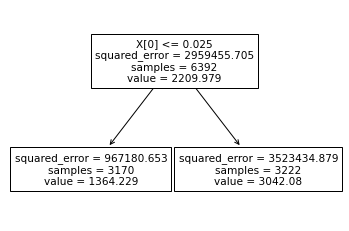

In [92]:
plot_tree(d_tree)

In [93]:
d_tree_var = DecisionTreeRegressor(max_depth=38)
v_tree_pipe = make_pipeline(preprocessor, d_tree_var)
v_tree_pipe.fit(X_train, y_train)
print('Train Data')
evaluate_regression(y_train, v_tree_pipe.predict(X_train))
print('\nTest Data')
evaluate_regression(y_test, v_tree_pipe.predict(X_test))

Train Data
sales: 
MSE: 447.59 
RMSE: 21.16 
R2: 1.00

Test Data
sales: 
MSE: 2,204,351.38 
RMSE: 1,484.71 
R2: 0.20


In [94]:
train_prd2 = d_tree_pipe.predict(X_train)
test_prd2 = d_tree_pipe.predict(X_test)

In [95]:
train_prices = d_tree_pipe.score(X_train, y_train)
test_prices = d_tree_pipe.score(X_test, y_test)
print(train_prices)
print(test_prices)

0.23779715896629317
0.2296825886952032


In [96]:
train_r2 = r2_score(y_train, train_prd2)
test_r2 = r2_score(y_test, test_prd2)

print(f'Model Training R2: {train_r2}')
print(f'Model Testing R2: {test_r2}')

Model Training R2: 0.23779715896629317
Model Testing R2: 0.2296825886952032


In [97]:
train_MSE = mean_squared_error(y_train, train_prd2)
test_MSE = mean_squared_error(y_test, test_prd2)

train_RMSE = np.sqrt(train_MSE)
test_RMSE = np.sqrt(test_MSE)

print(f'Model Training RMSE: {train_RMSE}')
print(f'Model Testing RMSE: {test_RMSE}')

## with this model it seems that utilizing the RMSE gives us a pair of results that are fairly close together compared to the r2

Model Training RMSE: 1501.900644484699
Model Testing RMSE: 1457.8368366151103


### Given that the results came much closer together and seemed to correlate well to the data used, my recommendation is to utilize the regression tree model so that the most accurate outcome is present.